In [1]:
from sympy.physics.quantum import Commutator, Dagger, Operator
from sympy import Symbol, exp, expand, simplify, collect, solve, Eq
from sympy.matrices import Matrix
import sympy as sp

import numpy as np

In [64]:
h = Symbol('h')

b1 = Operator('b1')
b2 = Operator('b2')
b3 = Operator('b3')
b4 = Operator('b4')

A1 = Operator('A1')
A2 = Operator('A2')
A3 = Operator('A3')

A1_ = Operator('A_1')
A2_ = Operator('A_2')
A3_ = Operator('A_3')

A0u = Operator('A^{(0)}')
A1u = Operator('A^{(1)}')
A2u = Operator('A^{(2)}')

c1 = Symbol('c1')
c3 = Symbol('c3')
c12 = Symbol('c12')
c23 = Symbol('c23')
c113 = Symbol('c113')
c212 = Symbol('c212')
c1112 = Symbol('c1112')


x11 = Symbol('x_{1,1}')
x12 = Symbol('x_{1,2}')

# From $A(\tau_i)$ to the $b_i$ basis

In [3]:
def generate_T(order):
    T = Matrix(order, order, lambda i,j: (1-(-1)**(i+j+1))/((i+j+1)*2**(i+j+1)))
    return T

T = generate_T(2)
R = T.inv()
T, R

(Matrix([
 [1,    0],
 [0, 1/12]]),
 Matrix([
 [1,  0],
 [0, 12]]))

In [4]:
def gauss_legendre(n,x):
    Pnx = sp.legendre(n,x)
    Pp = sp.diff(Pnx,x)
    ci = sp.solve( Pnx, x )
    wi = [ sp.simplify(2/(1 - xj**2)/(Pp.subs(x,xj))**2) for xj in ci ]
    return ci, wi

def generate_Q(order):
    x = sp.Symbol('x')
    ci, wi = gauss_legendre(order,x)
    # sort the roots and weights
    indices = [ci.index(c) for c in np.sort(ci)]
    ci = [ci[i] for i in indices]
    wi = [wi[i] for i in indices]
    Q = Matrix(order, order, lambda i,j: wi[j]*(ci[j]**i)/(2**(i+1)))
    return Q

Q = generate_Q(2)
Q

Matrix([
[        1/2,        1/2],
[-sqrt(3)/12, sqrt(3)/12]])

In [5]:
R, Q

(Matrix([
 [1,  0],
 [0, 12]]),
 Matrix([
 [        1/2,        1/2],
 [-sqrt(3)/12, sqrt(3)/12]]))

In [6]:
R @ Q

Matrix([
[     1/2,     1/2],
[-sqrt(3), sqrt(3)]])

# Magnus operator.

## Order 4

Magnus operator $\Omega$ of order $O(h^4)$.

In [7]:
Sigma4 = (c1 * b1 * h) + h**3 * (c12 * Commutator(b1, b2))

In [8]:
M4 = simplify(exp(Sigma4).series(h, 0, n=5))
M4

1 + h**3*(c1**3*b1**3 + 6*c12*(b1*b2 - b2*b1))/6 + c1*h*b1 + c1*h**4*(c1**3*b1**4 + 12*c12*(b1*b2 - b2*b1)*b1 + 12*c12*b1*(b1*b2 - b2*b1))/24 + c1**2*h**2*b1**2/2 + O(h**5)

In [9]:
poly_M4 = collect(expand(M4), h, evaluate = False)
poly_M4

{h: c1*b1,
 h**2: c1**2*b1**2/2,
 h**3: c1**3*b1**3/6 + c12*b1*b2 - c12*b2*b1,
 h**4: c1**4*b1**4/24 + c1*c12*b1**2*b2/2 - c1*c12*b2*b1**2/2,
 1: 1 + O(h**5)}

## Order 6

Magnus operator $\Omega$ of order $O(h^7)$.

In [10]:
Sigma6 = (c1 * b1 * h) + h**3 * (c12 * Commutator(b1, b2) +
        c3 * b3) + h**5 * (c23 * Commutator(b2, b3) + 
        c113 * Commutator(b1, Commutator(b1, b3)) + c212 * Commutator(b2, Commutator(b1, b2)) + c1112 * Commutator(b1, Commutator(b1, Commutator(b1, b2)))
)

In [11]:
M6 = simplify(exp(Sigma6).series(h, 0, n=7))
M6

1 + h**3*(c1**3*b1**3/6 + c12*(b1*b2 - b2*b1) + c3*b3) + h**4*(c1**4*b1**4/24 + c1*c12*(b1*b2 - b2*b1)*b1/2 + c1*c12*b1*(b1*b2 - b2*b1)/2 + c1*c3*b1*b3/2 + c1*c3*b3*b1/2) + h**5*(c1**5*b1**5/120 + c1**2*c12*(b1*b2 - b2*b1)*b1**2/6 + c1**2*c12*b1*(b1*b2 - b2*b1)*b1/6 + c1**2*c12*b1**2*(b1*b2 - b2*b1)/6 + c1**2*c3*b1*b3*b1/6 + c1**2*c3*b1**2*b3/6 + c1**2*c3*b3*b1**2/6 + c1112*(((b1*b2 - b2*b1)*b1 - b1*(b1*b2 - b2*b1))*b1 - b1*((b1*b2 - b2*b1)*b1 - b1*(b1*b2 - b2*b1))) - c113*((b1*b3 - b3*b1)*b1 - b1*(b1*b3 - b3*b1)) - c212*((b1*b2 - b2*b1)*b2 - b2*(b1*b2 - b2*b1)) + c23*(b2*b3 - b3*b2)) + h**6*(c1**6*b1**6/720 + c1**3*c12*(b1*b2 - b2*b1)*b1**3/24 + c1**3*c12*b1*(b1*b2 - b2*b1)*b1**2/24 + c1**3*c12*b1**2*(b1*b2 - b2*b1)*b1/24 + c1**3*c12*b1**3*(b1*b2 - b2*b1)/24 + c1**3*c3*b1*b3*b1**2/24 + c1**3*c3*b1**2*b3*b1/24 + c1**3*c3*b1**3*b3/24 + c1**3*c3*b3*b1**3/24 + c1*c1112*(((b1*b2 - b2*b1)*b1 - b1*(b1*b2 - b2*b1))*b1 - b1*((b1*b2 - b2*b1)*b1 - b1*(b1*b2 - b2*b1)))*b1/2 + c1*c1112*b1*(((b1*b2

In [12]:
poly_M6 = collect(expand(M6), h, evaluate = False)
poly_M6

{h: c1*b1,
 h**3: c1**3*b1**3/6 + c12*b1*b2 - c12*b2*b1 + c3*b3,
 h**2: c1**2*b1**2/2,
 h**6: c1**6*b1**6/720 + c1**3*c12*b1**4*b2/24 - c1**3*c12*b2*b1**4/24 + c1**3*c3*b1*b3*b1**2/24 + c1**3*c3*b1**2*b3*b1/24 + c1**3*c3*b1**3*b3/24 + c1**3*c3*b3*b1**3/24 + c1*c1112*b1*b2*b1**3 - c1*c1112*b1**3*b2*b1 + c1*c1112*b1**4*b2/2 - c1*c1112*b2*b1**4/2 - c1*c113*b1*b3*b1**2/2 - c1*c113*b1**2*b3*b1/2 + c1*c113*b1**3*b3/2 + c1*c113*b3*b1**3/2 + c1*c212*b1*b2*b1*b2 - c1*c212*b1*b2**2*b1 - c1*c212*b1**2*b2**2/2 + c1*c212*b2*b1*b2*b1 - c1*c212*b2**2*b1**2/2 + c1*c23*b1*b2*b3/2 - c1*c23*b1*b3*b2/2 + c1*c23*b2*b3*b1/2 - c1*c23*b3*b2*b1/2 + c12**2*b1*b2*b1*b2/2 - c12**2*b1*b2**2*b1/2 + c12**2*b2*b1*b2*b1/2 - c12**2*b2*b1**2*b2/2 + c12*c3*b1*b2*b3/2 - c12*c3*b2*b1*b3/2 + c12*c3*b3*b1*b2/2 - c12*c3*b3*b2*b1/2 + c3**2*b3**2/2,
 h**4: c1**4*b1**4/24 + c1*c12*b1**2*b2/2 - c1*c12*b2*b1**2/2 + c1*c3*b1*b3/2 + c1*c3*b3*b1/2,
 h**5: c1**5*b1**5/120 + c1**2*c12*b1**3*b2/6 - c1**2*c12*b2*b1**3/6 + c1**2*c3*b1*b3*

# Commutator free operators

## $\Psi_{2}^{[4]}$

Now we have to define our available operators.

In [13]:
Psi42_1 = exp(x11 * b1 * h + x12 * b2 * h**2)
Psi42_2 = exp(x11 * b1 * h - x12 * b2 * h**2)

poly_psi42_1 = simplify(Psi42_1.series(h, 0, n=7))
poly_psi42_2 = simplify(Psi42_2.series(h, 0, n=7))

poly_psi42 = simplify(simplify(poly_psi42_1 * poly_psi42_2).series(h, 0, n=7))
poly_psi42

1 + 2*h*x_{1,1}*b1 + 2*h**2*x_{1,1}**2*b1**2 + h**3*x_{1,1}*(4*x_{1,1}**2*b1**3 - 3*x_{1,2}*b1*b2 + 3*x_{1,2}*b2*b1)/3 + h**4*x_{1,1}**2*(2*x_{1,1}**2*b1**4 - 3*x_{1,2}*b1**2*b2 + 3*x_{1,2}*b2*b1**2)/3 + h**5*x_{1,1}*(16*x_{1,1}**4*b1**5 + 15*x_{1,1}**2*x_{1,2}*b1*b2*b1**2 - 15*x_{1,1}**2*x_{1,2}*b1**2*b2*b1 - 35*x_{1,1}**2*x_{1,2}*b1**3*b2 + 35*x_{1,1}**2*x_{1,2}*b2*b1**3 + 20*x_{1,2}**2*b1*b2**2 - 40*x_{1,2}**2*b2*b1*b2 + 20*x_{1,2}**2*b2**2*b1)/60 + h**6*x_{1,1}**2*(16*x_{1,1}**4*b1**6 + 30*x_{1,1}**2*x_{1,2}*b1*b2*b1**3 - 30*x_{1,1}**2*x_{1,2}*b1**3*b2*b1 - 45*x_{1,1}**2*x_{1,2}*b1**4*b2 + 45*x_{1,1}**2*x_{1,2}*b2*b1**4 - 30*x_{1,2}**2*(b1*b2)**2 - 30*x_{1,2}**2*(b2*b1)**2 + 30*x_{1,2}**2*b1*b2**2*b1 + 60*x_{1,2}**2*b1**2*b2**2 - 90*x_{1,2}**2*b2*b1**2*b2 + 60*x_{1,2}**2*b2**2*b1**2)/180 + O(h**7)

In [14]:
poly_Psi42 = collect(expand(poly_psi42), h, evaluate = False)
poly_Psi42

{h: 2*x_{1,1}*b1,
 h**2: 2*x_{1,1}**2*b1**2,
 h**4: 2*x_{1,1}**4*b1**4/3 - x_{1,1}**2*x_{1,2}*b1**2*b2 + x_{1,1}**2*x_{1,2}*b2*b1**2,
 h**3: 4*x_{1,1}**3*b1**3/3 - x_{1,1}*x_{1,2}*b1*b2 + x_{1,1}*x_{1,2}*b2*b1,
 h**5: 4*x_{1,1}**5*b1**5/15 + x_{1,1}**3*x_{1,2}*b1*b2*b1**2/4 - x_{1,1}**3*x_{1,2}*b1**2*b2*b1/4 - 7*x_{1,1}**3*x_{1,2}*b1**3*b2/12 + 7*x_{1,1}**3*x_{1,2}*b2*b1**3/12 + x_{1,1}*x_{1,2}**2*b1*b2**2/3 - 2*x_{1,1}*x_{1,2}**2*b2*b1*b2/3 + x_{1,1}*x_{1,2}**2*b2**2*b1/3,
 h**6: 4*x_{1,1}**6*b1**6/45 + x_{1,1}**4*x_{1,2}*b1*b2*b1**3/6 - x_{1,1}**4*x_{1,2}*b1**3*b2*b1/6 - x_{1,1}**4*x_{1,2}*b1**4*b2/4 + x_{1,1}**4*x_{1,2}*b2*b1**4/4 - x_{1,1}**2*x_{1,2}**2*b1*b2*b1*b2/6 + x_{1,1}**2*x_{1,2}**2*b1*b2**2*b1/6 + x_{1,1}**2*x_{1,2}**2*b1**2*b2**2/3 - x_{1,1}**2*x_{1,2}**2*b2*b1*b2*b1/6 - x_{1,1}**2*x_{1,2}**2*b2*b1**2*b2/2 + x_{1,1}**2*x_{1,2}**2*b2**2*b1**2/3,
 1: 1 + O(h**7)}

In [15]:
solution = solve(Eq(poly_M4[h], poly_Psi42[h]))
s = solve(Eq(list(solution[0].keys())[0], list(solution[0].values())[0]), x11)
s[0]

c1/2

In [16]:
for k in poly_Psi42.keys():
    poly_Psi42[k] = poly_Psi42[k].subs(x11, s[0])

In [17]:
Eq(poly_M4[h**3], poly_Psi42[h**3])

Eq(c1**3*b1**3/6 + c12*b1*b2 - c12*b2*b1, c1**3*b1**3/6 - c1*x_{1,2}*b1*b2/2 + c1*x_{1,2}*b2*b1/2)

As a consequence we take the value $x_{1,2} = - \frac{2c_{1,2}}{c_{1}}$.

In [18]:
for k in poly_Psi42.keys():
    poly_Psi42[k] = poly_Psi42[k].subs(x12, -2*c12/c1)

We can check that this two substitutions make approximation correct up to order $O(h^5)$.

In [19]:
for k in poly_M4.keys():
    print(f'order O({k})', Eq(poly_Psi42[k], poly_M4[k]))

order O(h) True
order O(h**2) True
order O(h**3) True
order O(h**4) True
order O(1) Eq(1 + O(h**7), 1 + O(h**5))


In [20]:
for k in poly_M6.keys():
    print(f'order O({k}):')
    display(Eq(poly_Psi42[k], poly_M6[k]))

order O(h):


True

order O(h**3):


Eq(c1**3*b1**3/6 + c12*b1*b2 - c12*b2*b1, c1**3*b1**3/6 + c12*b1*b2 - c12*b2*b1 + c3*b3)

order O(h**2):


True

order O(h**6):


Eq(c1**6*b1**6/720 - c1**3*c12*b1*b2*b1**3/48 + c1**3*c12*b1**3*b2*b1/48 + c1**3*c12*b1**4*b2/32 - c1**3*c12*b2*b1**4/32 - c12**2*b1*b2*b1*b2/6 + c12**2*b1*b2**2*b1/6 + c12**2*b1**2*b2**2/3 - c12**2*b2*b1*b2*b1/6 - c12**2*b2*b1**2*b2/2 + c12**2*b2**2*b1**2/3, c1**6*b1**6/720 + c1**3*c12*b1**4*b2/24 - c1**3*c12*b2*b1**4/24 + c1**3*c3*b1*b3*b1**2/24 + c1**3*c3*b1**2*b3*b1/24 + c1**3*c3*b1**3*b3/24 + c1**3*c3*b3*b1**3/24 + c1*c1112*b1*b2*b1**3 - c1*c1112*b1**3*b2*b1 + c1*c1112*b1**4*b2/2 - c1*c1112*b2*b1**4/2 - c1*c113*b1*b3*b1**2/2 - c1*c113*b1**2*b3*b1/2 + c1*c113*b1**3*b3/2 + c1*c113*b3*b1**3/2 + c1*c212*b1*b2*b1*b2 - c1*c212*b1*b2**2*b1 - c1*c212*b1**2*b2**2/2 + c1*c212*b2*b1*b2*b1 - c1*c212*b2**2*b1**2/2 + c1*c23*b1*b2*b3/2 - c1*c23*b1*b3*b2/2 + c1*c23*b2*b3*b1/2 - c1*c23*b3*b2*b1/2 + c12**2*b1*b2*b1*b2/2 - c12**2*b1*b2**2*b1/2 + c12**2*b2*b1*b2*b1/2 - c12**2*b2*b1**2*b2/2 + c12*c3*b1*b2*b3/2 - c12*c3*b2*b1*b3/2 + c12*c3*b3*b1*b2/2 - c12*c3*b3*b2*b1/2 + c3**2*b3**2/2)

order O(h**4):


Eq(c1**4*b1**4/24 + c1*c12*b1**2*b2/2 - c1*c12*b2*b1**2/2, c1**4*b1**4/24 + c1*c12*b1**2*b2/2 - c1*c12*b2*b1**2/2 + c1*c3*b1*b3/2 + c1*c3*b3*b1/2)

order O(h**5):


Eq(c1**5*b1**5/120 - c1**2*c12*b1*b2*b1**2/16 + c1**2*c12*b1**2*b2*b1/16 + 7*c1**2*c12*b1**3*b2/48 - 7*c1**2*c12*b2*b1**3/48 + 2*c12**2*b1*b2**2/(3*c1) - 4*c12**2*b2*b1*b2/(3*c1) + 2*c12**2*b2**2*b1/(3*c1), c1**5*b1**5/120 + c1**2*c12*b1**3*b2/6 - c1**2*c12*b2*b1**3/6 + c1**2*c3*b1*b3*b1/6 + c1**2*c3*b1**2*b3/6 + c1**2*c3*b3*b1**2/6 + 3*c1112*b1*b2*b1**2 - 3*c1112*b1**2*b2*b1 + c1112*b1**3*b2 - c1112*b2*b1**3 - 2*c113*b1*b3*b1 + c113*b1**2*b3 + c113*b3*b1**2 - c212*b1*b2**2 + 2*c212*b2*b1*b2 - c212*b2**2*b1 + c23*b2*b3 - c23*b3*b2)

order O(1):


True

In [21]:
display(Eq(poly_Psi42[h**5], poly_M6[h**5]))

Eq(c1**5*b1**5/120 - c1**2*c12*b1*b2*b1**2/16 + c1**2*c12*b1**2*b2*b1/16 + 7*c1**2*c12*b1**3*b2/48 - 7*c1**2*c12*b2*b1**3/48 + 2*c12**2*b1*b2**2/(3*c1) - 4*c12**2*b2*b1*b2/(3*c1) + 2*c12**2*b2**2*b1/(3*c1), c1**5*b1**5/120 + c1**2*c12*b1**3*b2/6 - c1**2*c12*b2*b1**3/6 + c1**2*c3*b1*b3*b1/6 + c1**2*c3*b1**2*b3/6 + c1**2*c3*b3*b1**2/6 + 3*c1112*b1*b2*b1**2 - 3*c1112*b1**2*b2*b1 + c1112*b1**3*b2 - c1112*b2*b1**3 - 2*c113*b1*b3*b1 + c113*b1**2*b3 + c113*b3*b1**2 - c212*b1*b2**2 + 2*c212*b2*b1*b2 - c212*b2**2*b1 + c23*b2*b3 - c23*b3*b2)

We need to make sure that the order $O(h^5)$ terms cancel out when we change basis back to $A(\tau_i)$.

In [22]:
Q = generate_Q(2)
T = generate_T(2)
R = T.inv()
A2s = R @ Q @ Matrix([A1, A2])
poly_Psi42_As4 = expand(poly_Psi42[h**4].subs(b1, A2s[0]).subs(b2, A2s[1]))

poly_Psi42_As4 = simplify(poly_Psi42_As4)
poly_Psi42_As4

c1*(c1**3*(A1*A2)**2 + c1**3*(A2*A1)**2 + c1**3*A1*A2*A1**2 + c1**3*A1*A2**2*A1 + c1**3*A1*A2**3 + c1**3*A1**2*A2*A1 + c1**3*A1**2*A2**2 + c1**3*A1**3*A2 + c1**3*A1**4 + c1**3*A2*A1*A2**2 + c1**3*A2*A1**2*A2 + c1**3*A2*A1**3 + c1**3*A2**2*A1*A2 + c1**3*A2**2*A1**2 + c1**3*A2**3*A1 + c1**3*A2**4 + 96*sqrt(3)*c12*A1*A2**2 + 96*sqrt(3)*c12*A1**2*A2 - 96*sqrt(3)*c12*A2*A1**2 - 96*sqrt(3)*c12*A2**2*A1)/384

In [24]:
Q = generate_Q(3)
T = generate_T(3)
R = T.inv()
A3s = R @ Q @ Matrix([A1, A2, A3])
poly_M6_As5 = expand(poly_M6[h**5].subs(b1, A3s[0]).subs(b2, A3s[1]).subs(b3, A3s[2]))

poly_M6_As5 = simplify(poly_M6_As5)

poly_M6_As5

(3*c1**5*A2**5 + 20*sqrt(15)*c1**2*c12*A1*A2**3 - 20*sqrt(15)*c1**2*c12*A2**3*A1 + 20*sqrt(15)*c1**2*c12*A2**3*A3 - 20*sqrt(15)*c1**2*c12*A3*A2**3 + 200*c1**2*c3*A1*A2**2 + 200*c1**2*c3*A2*A1*A2 + 200*c1**2*c3*A2*A3*A2 + 200*c1**2*c3*A2**2*A1 + 200*c1**2*c3*A2**2*A3 - 1200*c1**2*c3*A2**3 + 200*c1**2*c3*A3*A2**2 + 120*sqrt(15)*c1112*A1*A2**3 - 360*sqrt(15)*c1112*A2*A1*A2**2 + 360*sqrt(15)*c1112*A2*A3*A2**2 + 360*sqrt(15)*c1112*A2**2*A1*A2 - 360*sqrt(15)*c1112*A2**2*A3*A2 - 120*sqrt(15)*c1112*A2**3*A1 + 120*sqrt(15)*c1112*A2**3*A3 - 120*sqrt(15)*c1112*A3*A2**3 + 1200*c113*A1*A2**2 - 2400*c113*A2*A1*A2 - 2400*c113*A2*A3*A2 + 1200*c113*A2**2*A1 + 1200*c113*A2**2*A3 + 1200*c113*A3*A2**2 + 1200*c212*A1*A2*A1 - 1200*c212*A1*A2*A3 + 600*c212*A1*A3*A2 - 600*c212*A1**2*A2 + 600*c212*A2*A1*A3 - 600*c212*A2*A1**2 + 600*c212*A2*A3*A1 - 600*c212*A2*A3**2 + 600*c212*A3*A1*A2 - 1200*c212*A3*A2*A1 + 1200*c212*A3*A2*A3 - 600*c212*A3**2*A2 + 800*sqrt(15)*c23*A1*A2 - 800*sqrt(15)*c23*A1*A3 - 800*sqrt(15)*

In [26]:
diff = simplify(poly_Psi42_As4 - poly_M6_As5)
diff

(15*c1*(c1**3*(A1*A2)**2 + c1**3*(A2*A1)**2 + c1**3*A1*A2*A1**2 + c1**3*A1*A2**2*A1 + c1**3*A1*A2**3 + c1**3*A1**2*A2*A1 + c1**3*A1**2*A2**2 + c1**3*A1**3*A2 + c1**3*A1**4 + c1**3*A2*A1*A2**2 + c1**3*A2*A1**2*A2 + c1**3*A2*A1**3 + c1**3*A2**2*A1*A2 + c1**3*A2**2*A1**2 + c1**3*A2**3*A1 + c1**3*A2**4 + 96*sqrt(3)*c12*A1*A2**2 + 96*sqrt(3)*c12*A1**2*A2 - 96*sqrt(3)*c12*A2*A1**2 - 96*sqrt(3)*c12*A2**2*A1) - 16*(3*c1**5*A2**5 + 20*sqrt(15)*c1**2*c12*A1*A2**3 - 20*sqrt(15)*c1**2*c12*A2**3*A1 + 20*sqrt(15)*c1**2*c12*A2**3*A3 - 20*sqrt(15)*c1**2*c12*A3*A2**3 + 200*c1**2*c3*A1*A2**2 + 200*c1**2*c3*A2*A1*A2 + 200*c1**2*c3*A2*A3*A2 + 200*c1**2*c3*A2**2*A1 + 200*c1**2*c3*A2**2*A3 - 1200*c1**2*c3*A2**3 + 200*c1**2*c3*A3*A2**2 + 120*sqrt(15)*c1112*A1*A2**3 - 360*sqrt(15)*c1112*A2*A1*A2**2 + 360*sqrt(15)*c1112*A2*A3*A2**2 + 360*sqrt(15)*c1112*A2**2*A1*A2 - 360*sqrt(15)*c1112*A2**2*A3*A2 - 120*sqrt(15)*c1112*A2**3*A1 + 120*sqrt(15)*c1112*A2**3*A3 - 120*sqrt(15)*c1112*A3*A2**3 + 1200*c113*A1*A2**2 - 24

## Checking that adding $\frac{1}{12}b_3$ does not change things

Error for each error term:


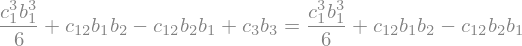

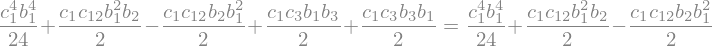

In [ ]:
Sigma4w3 = (c1 * b1 * h) + h**3 * (c12 * Commutator(b1, b2) + c3*b3)

M4w3 = simplify(exp(Sigma4w3).series(h, 0, n=5))
poly_M4w3 = collect(expand(M4w3), h, evaluate = False)

print('Error for each error term:')
for k in poly_M4.keys():
    display(k,  Eq(poly_M4w3[k], poly_M4[k]))



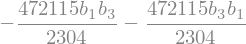

In [ ]:
b1v = Matrix([b1, 0, 0])
b3v = Matrix([0, 0, b3])
As = Q.inv() @ R.inv() @ Matrix([b1, b2, b3])

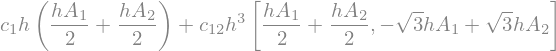

In [ ]:
Q = generate_Q(2)
T = generate_T(2)
R = T.inv()
bm2 = h * R @ Q @ Matrix([A1, A2])

Sigma4.subs(b1, bm2[0]).subs(b2, bm2[1])

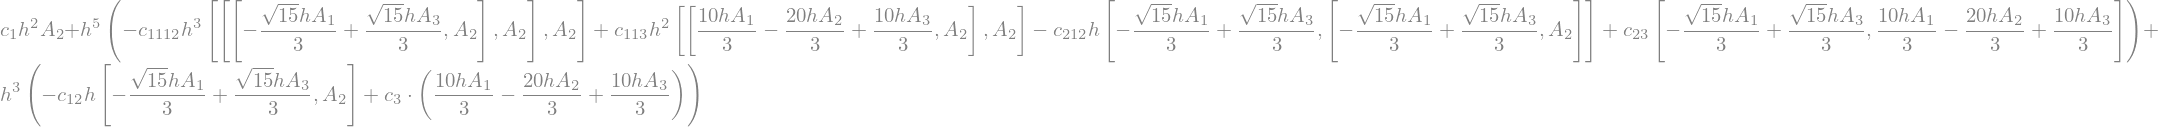

In [ ]:
Q = generate_Q(3)
T = generate_T(3)
R = T.inv()
bm3 = h * R @ Q @ Matrix([A1, A2, A3])

Sigma6.subs(b1, bm3[0]).subs(b2, bm3[1]).subs(b3, bm3[2])

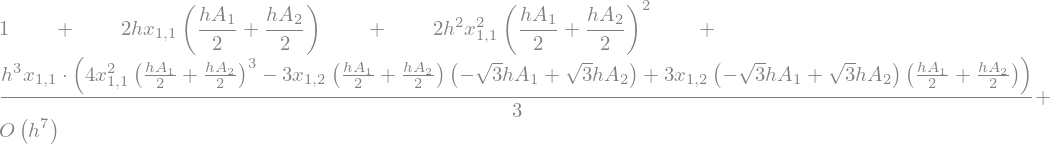

In [ ]:
Q = generate_Q(2)
T = generate_T(2)
R = T.inv()
bm2 = h * R @ Q @ Matrix([A1, A2])

poly_psi42.subs(b1, bm2[0]).subs(b2, bm2[1])

## $A^{(0)}$ reproduces $\frac{1}{12} b_3$ when a quadrature of order $2$ is used

First we need to get rid of the $h$ factors in the $b_i$ basis, as the $b_i$ already includes a $h^i$ factor. Let us remember the expression for $\Omega^{[4]}$:

In [51]:
Sigma4.subs(h, 1)

c1*b1 + c12*[b1,b2]

We first move to the ${A^{(i)}}$ basis.

In [56]:
Q2 = generate_Q(2)
T2 = generate_T(2)
R2 = T2.inv()

Ad = Matrix([A1_, A2_])
Au = Matrix([A0u, A1u])
bs = Matrix([b1, b2])

# bs = R Au = R Q Ad
bs = R2 @ Au

# Replace in Sigma4
Sigma4u = Sigma4.subs(b1, bs[0]).subs(b2, bs[1]).subs(h, 1)

Sigma4u

c1*A^{(0)} + 12*c12*[A^{(0)},A^{(1)}]

We can check that the expression in the $A^{(i)}$ basis is correct up to order $O(h^5)$, and automatically includes the missing $\frac{1}{12}b_3 = O(h^3)$ term. 

In [57]:
Q3 = generate_Q(3)
T3 = generate_T(3)
R3 = T3.inv()

bs = Matrix([b1, b2, b3])
Au = T3 @ bs

# Replace in Sigma4_
Sigma4_3 = Sigma4u.subs(A0u, Au[0]).subs(A1u, Au[1]).subs(A2u, Au[2]).subs(h, 1)

Sigma4_3

c1*(b1 + b3/12) + c12*[b1 + b3/12,b2]

Which coincides with $\Omega^{[4]}$ up to a factor proportional to $[b_3, b_2]$, which is $O(h^5)$, but including the terms that appear in $\Omega^{[6]}$.

Consequently, to compare the error of two approximations, we need to take both expressions in the $A^{(i)}$ basis. Then, we convert the difference back to the original $A_i$ basis, using the quadrature for the higher order one.

Note that it is important to use the same quadrature for both approximations, otherwise there will be a difference. Let us show it:

In [58]:
Ad = Matrix([A1_, A2_])
Au = Matrix([A0u, A1u])
bs = Matrix([b1, b2])

# bs = R Au = R Q Ad
bs = R2 @ Q2 @ Ad

# Replace in Sigma4
Sigma4_ = Sigma4.subs(b1, bs[0]).subs(b2, bs[1]).subs(h, 1)

Sigma4_

c1*(A_1/2 + A_2/2) + c12*[A_1/2 + A_2/2,-sqrt(3)*A_1 + sqrt(3)*A_2]

In [61]:
bs = Matrix([b1, b2, b3])
Ad = Q3 @ T3 @ bs

# Replace in Sigma4_
Sigma4_3 = Sigma4_.subs(A1_, Ad[0]).subs(A2_, Ad[1]).subs(A3_, Ad[2]).subs(h, 1)

Sigma4_3

c1*((-11*sqrt(15)*b1/432 - 17*sqrt(15)*b3/8640)/2 + (65*b1/216 + b2/27 + 23*b3/864)/2) + c12*[(-11*sqrt(15)*b1/432 - 17*sqrt(15)*b3/8640)/2 + (65*b1/216 + b2/27 + 23*b3/864)/2,sqrt(3)*(-11*sqrt(15)*b1/432 - 17*sqrt(15)*b3/8640) - sqrt(3)*(65*b1/216 + b2/27 + 23*b3/864)]

In [62]:
Sigma4

c1*h*b1 + c12*h**3*[b1,b2]

## Doing the same for terms $\frac{1}{80}b_5 - \frac{1}{80}[1,5]$

In [79]:
Q3 = generate_Q(3)
T3 = generate_T(3)
R3 = T3.inv()

Ad = Matrix([A1_, A2_, A3_])
Au = Matrix([A0u, A1u, A2u])
bs = Matrix([b1, b2, b3])

# bs = R Au = R Q Ad
bs = R3 @ Au

# Replace in Sigma4
Sigma6u = Sigma6.subs(b1, bs[0]).subs(b2, bs[1]).subs(b3, bs[2]).subs(h, 1)

Sigma6u_subs = Sigma6u.subs(c1, 1).subs(c12, -1/12).subs(c1112, 1/720).subs(c113, 1/360).subs(c23, 1/240).subs(c212, -1/240).subs(c3, 1/12)
Sigma6u_subs

0.0833333333333333*(-15*A^{(0)} + 180*A^{(2)}) - 0.05*[-15*A^{(0)} + 180*A^{(2)},A^{(1)}] - 0.00277777777777778*[9*A^{(0)}/4 - 15*A^{(2)},[-15*A^{(0)} + 180*A^{(2)},9*A^{(0)}/4 - 15*A^{(2)}]] + 0.0166666666666667*[9*A^{(0)}/4 - 15*A^{(2)},[9*A^{(0)}/4 - 15*A^{(2)},[9*A^{(0)}/4 - 15*A^{(2)},A^{(1)}]]] - 1.0*[9*A^{(0)}/4 - 15*A^{(2)},A^{(1)}] + 0.6*[[9*A^{(0)}/4 - 15*A^{(2)},A^{(1)}],A^{(1)}] + 9*A^{(0)}/4 - 15*A^{(2)}

We can see that only the terms with a single commutator contribute. Let us check, that the sum of those terms is equivalent to
$$[A^{(1)}, \frac{3}{2}A^{(0)}-6A^{(2)}].$$


In [80]:
expression = -0.05*Commutator(-15*A0u+180*A2u, A1u)-Commutator(9/4*A0u-15*A2u, A1u)
simplify(expression)

-1.5*A^{(0)}*A^{(1)} + 1.5*A^{(1)}*A^{(0)} - 6.0*A^{(1)}*A^{(2)} + 6.0*A^{(2)}*A^{(1)}

In [81]:
comm = Commutator(A1u, 3/2*A0u-6* A2u)
simplify(comm)

-((1.5*A^{(0)} - 6*A^{(2)})*A^{(1)} - A^{(1)}*(1.5*A^{(0)} - 6*A^{(2)}))

Clearly, both terms are the same. Now let us see that we obtain the factor of $\frac{1}{80}[b_1, b_4]$.

In [78]:
comm = Commutator(A1u, 3/2*A0u-6* A2u)

bs = Matrix([b1, b2, b3, b4])

T4 = generate_T(4)
Au = T4 @ bs

comm_bs = comm.subs(A0u, Au[0]).subs(A1u, Au[1]).subs(A2u, Au[2]).subs(h, 1)
comm_bs

-[-6*(b1/12 + b3/80) + 1.5*(b1 + b3/12),b2/12 + b4/80]

Since
$$-6/12 + 1.5 = 1,$$
we obtain the prefactor needed to obtain a factor of 
$$\frac{-1}{80}[b_1,b4].$$
Alternatively we can see this from the backsubstitution

In [87]:
Q4 = generate_Q(4)
T4 = generate_T(4)
R4 = T4.inv()

bs = Matrix([b1, b2, b3, b4])
Au = T4 @ bs

# Replace in Sigma4_
Sigma6_5 = Sigma6u.subs(A0u, Au[0]).subs(A1u, Au[1]).subs(A2u, Au[2]).subs(h, 1)

Sigma6_5subs = Sigma6_5.subs(c1, 1).subs(c12, -1/12).subs(c1112, 1/720).subs(c113, 1/360).subs(c23, 1/240).subs(c212, -1/240).subs(c3, 1/12)
simplify(Sigma6_5subs)

(240*b1 - 20*b1*b2 + b1*b2*b1**2 + 0.15*b1*b2*b4 + b1*b2**2 - 1.33333333333333*b1*b3*b1 - 3*b1*b4 + 0.15*b1*b4*b1**2 + 0.15*b1*b4*b2 + 0.0225*b1*b4**2 - 1.0*b1**2*b2*b1 + 0.666666666666667*b1**2*b3 - 0.15*b1**2*b4*b1 + 0.333333333333333*b1**3*b2 + 0.05*b1**3*b4 + 20*b2*b1 - 2.0*b2*b1*b2 - 0.3*b2*b1*b4 - 0.333333333333333*b2*b1**3 + b2*b3 + 0.15*b2*b4*b1 + b2**2*b1 + 20.0*b3 + 0.666666666666667*b3*b1**2 - 1.0*b3*b2 - 0.15*b3*b4 + 3*b4*b1 - 0.3*b4*b1*b2 - 0.045*b4*b1*b4 - 0.05*b4*b1**3 + 0.15*b4*b2*b1 + 0.15*b4*b3 + 0.0225*b4**2*b1)/240

Where we obtain the terms $-\frac{3}{240} b_1 b_4+ \frac{3}{240} b_4 b_1 = -\frac{1}{80}[b_1, b_4]$

# Bounding the error of the product of exponentials

In [32]:
n = 5
s = 2
# Recursively generate the compositions of an integer n where each term has maximum value s
def compositions(n,s):
    r"""
    n: integers up to which compositions add up
    s: maximum value of each term in the composition
    """
    if n == 1:
        return [[1]]
    else:
        comps = []
        for i in range(1, n):
            for comp in compositions(n-i):
                comps.append([i] + comp)
        comps.append([n])

    new_comps = []
    for c in comps:
        if max(np.array(c)) <= s:
            new_comps.append(c)

    return new_comps


comps = compositions(n)

comps

# Given the 

[[1, 1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 1, 2, 1],
 [1, 1, 3],
 [1, 2, 1, 1],
 [1, 2, 2],
 [1, 3, 1],
 [1, 4],
 [2, 1, 1, 1],
 [2, 1, 2],
 [2, 2, 1],
 [2, 3],
 [3, 1, 1],
 [3, 2],
 [4, 1],
 [5]]

In [33]:
import numpy as np
new_comps = []
for c in comps:
    if max(np.array(c)) <= s:
        new_comps.append(c)

print(new_comps)

[[1, 1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 2, 1], [1, 2, 1, 1], [1, 2, 2], [2, 1, 1, 1], [2, 1, 2], [2, 2, 1]]


# Unused

## Expansion in terms of the generators

In [11]:
from sympy.functions.combinatorial.numbers import bernoulli
from sympy import symbols, Function, Sum, oo, factorial, Product
#a = bernoulli(12)
#a

t, h, s, k = symbols("t,h,s,k")
m, x_ij = symbols('m, x_{ij}')
x, i, j, t_12 = symbols('x i j t_{1/2}')
a_j = Operator("a_j")
f = Function("f")

A = Sum(a_j, (j, 0, s))**k
expand(A)


Sum(a_j, (j, 0, s))**k

In [34]:
expand((Sum(x_ij*a_j*h**j, (j, 1, s)))**k)

Piecewise((s**2*x_{ij}**2*a_j**2, Eq(h, 1)), (x_{ij}**2*(h - h**(s + 1))**2*a_j**2/(h - 1)**2, True))

In [29]:
m = symbols('m')

B = []
A = Sum( (Sum(x_ij*a_j*h**j, (j, 1, s)))**k/(factorial(k)), (k, 1, m))
display(A)


#A = Product(B[i], (i, 1, 3))

#A.series(h, 0, n=5)


Sum(Sum(h**j*x_{ij}*a_j, (j, 1, s))**k/factorial(k), (k, 1, m))

In [30]:
A = collect(expand(A), h, evaluate = False)
display(A)


AttributeError: 'Operator' object has no attribute 'name'

In [11]:
Omega = Function('Omega')(i)

# Define the recursive relationship for S_i
Omega = Eq(Omega(i), Omega(i-1) / i)

In [20]:
# Define the series S with recursively defined terms
S_series = Sum(t / i**2, (i, 1, oo))
print(str(S_series))


pi**2*t/6


In [69]:
from sympy import Function, symbols, rsolve, Eq, summation, oo

y = Function("y")
n = symbols("n")

# Define the recursive relation for the Fibonacci sequence
fib_relation = Eq(y(n), y(n - 1)/4 + y(n - 2)/4)

# Find the closed-form expression for y(n)
solution = rsolve(fib_relation, y(n), {y(0): 0, y(1): 1})

# Define the sum for an infinite number of terms
infinite_sum = summation(solution, (n, 0, oo))

infinite_sum

-4*sqrt(17)/(17*(sqrt(17)/8 + 7/8)) + 4*sqrt(17)/(17*(7/8 - sqrt(17)/8))

In [ ]:
j = 1
l = 2


In [ ]:
# Does not work!
'''
Psi42 = exp(x11 * b1 * h + x12 * b2 * h**2)*exp(x11 * b1 * h - x12 * b2 * h**2)

poly_psi42 = simplify(Psi42.series(h, 0, n=7))
poly_psi42
'''

'\nPsi42 = exp(x11 * b1 * h + x12 * b2 * h**2)*exp(x11 * b1 * h - x12 * b2 * h**2)\n\npoly_psi42 = simplify(Psi42.series(h, 0, n=7))\npoly_psi42\n'

In [ ]:
for k, vPsi42 in coeff_Psi42.items():
    print(k)
    vM4 = coeff_M4[k]
    solution = solve((vM4, vPsi42), x11, x12)
    print(solution)


NameError: name 'coeff_Psi42' is not defined

In [ ]:
coeff_dict

exp(2*h*x_{1,1}*b1)

In [ ]:
Psi_ = exp(x11 * b1 * h + x12 * b2 * h**2)*exp(-x11 * b1 * h + x12 * b2 * h**2)

poly_psi_= simplify(Psi_.series(h, 0, n=15))
poly_psi_

(315 + 630*h**2*x_{1,2}*b2 + 630*h**4*x_{1,2}**2*b2**2 + 420*h**6*x_{1,2}**3*b2**3 + 210*h**8*x_{1,2}**4*b2**4 + 84*h**10*x_{1,2}**5*b2**5 + 28*h**12*x_{1,2}**6*b2**6 + 8*h**14*x_{1,2}**7*b2**7 + O(h**15))/315